In [1]:
import numpy as np
import json
import codecs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from model import my_aggclustering

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
msdat_dir = '/home/hpms/Microsoft.IoT-Dump1.json'
with codecs.open(msdat_dir, 'r', 'utf-8-sig') as f:
    msdat = json.load(f)
msdat = pd.DataFrame(msdat)
msdat['Commands'] = [tuple(session) for session in msdat['Commands']]
msdat = msdat.drop_duplicates(subset='Commands').reset_index(drop=True)  # drop duplicates
msdat['Commands'] = [list(session) for session in msdat['Commands']]
msdat['Commands Length'] = [len(session) for session in msdat['Commands']]

In [5]:
def find_expected_predictive_prob(prob_list, max_depth):
    expected_predictive_prob = dict()
    prob_keys = [[] for i in range(max_depth)]
    prob_vals = [[] for i in range(max_depth)]
    prob_keys[0] = list(prob_list[0].keys())
    prob_vals[0] = list(prob_list[0].values())
    prob_keys_final = list(prob_list[0].keys())
    prob_vals_final = list(prob_list[0].values())
    for depth in range(max_depth-1):
        prob_keys[depth+1] = list(prob_list[depth+1].keys())
        prob_vals[depth+1] = list(prob_list[depth+1].values())
        for key in prob_keys[depth]:
            if (len(key) == 1):
                for next_keys in prob_keys[depth+1]:
                    next_keys_temp = [key[:depth+1] for key in next_keys]
                    if key[0] in next_keys_temp:
                        idx = prob_keys_final.index(key)
                        del prob_keys_final[idx]
                        del prob_vals_final[idx]
                        break
        prob_keys_final += list(prob_list[depth+1].keys())
        prob_vals_final += list(prob_list[depth+1].values())

    for key, val in zip(prob_keys_final, prob_vals_final):
        expected_predictive_prob[key] = val
    return expected_predictive_prob

### Baseline

$\alpha_{cluster} = \alpha_{label} = 0.1$,
No clustering.
12 length of sequence

In [137]:
my_agg = my_aggclustering(msdat, 0.1, -1, 0.1, 1)
my_agg.fit()
with open('data/aggclustering2_baseline.pkl', 'wb') as f:
    pickle.dump(my_agg, f)

Depth 0 started.
Depth 0 finished. Time spent: 241.58s.


In [138]:
with open('data/aggclustering2_baseline.pkl', 'rb') as f:
    my_agg = pickle.load(f)
clustering = my_agg.memory['clustering']
init_commands_lists = my_agg.memory['init_commands_lists']
posterior_dicts = my_agg.memory['posterior_dicts']
expected_predictive_prob = my_agg.memory['expected_predictive_prob']
A_list = my_agg.memory['A_list']
E_list = my_agg.memory['E_list']
seq_rank_list = my_agg.memory['seq_rank_list']
cluster_num = my_agg.memory['cluster_num']

In [135]:
pred_prob = find_expected_predictive_prob(expected_predictive_prob, 1)
y = list(pred_prob.values())

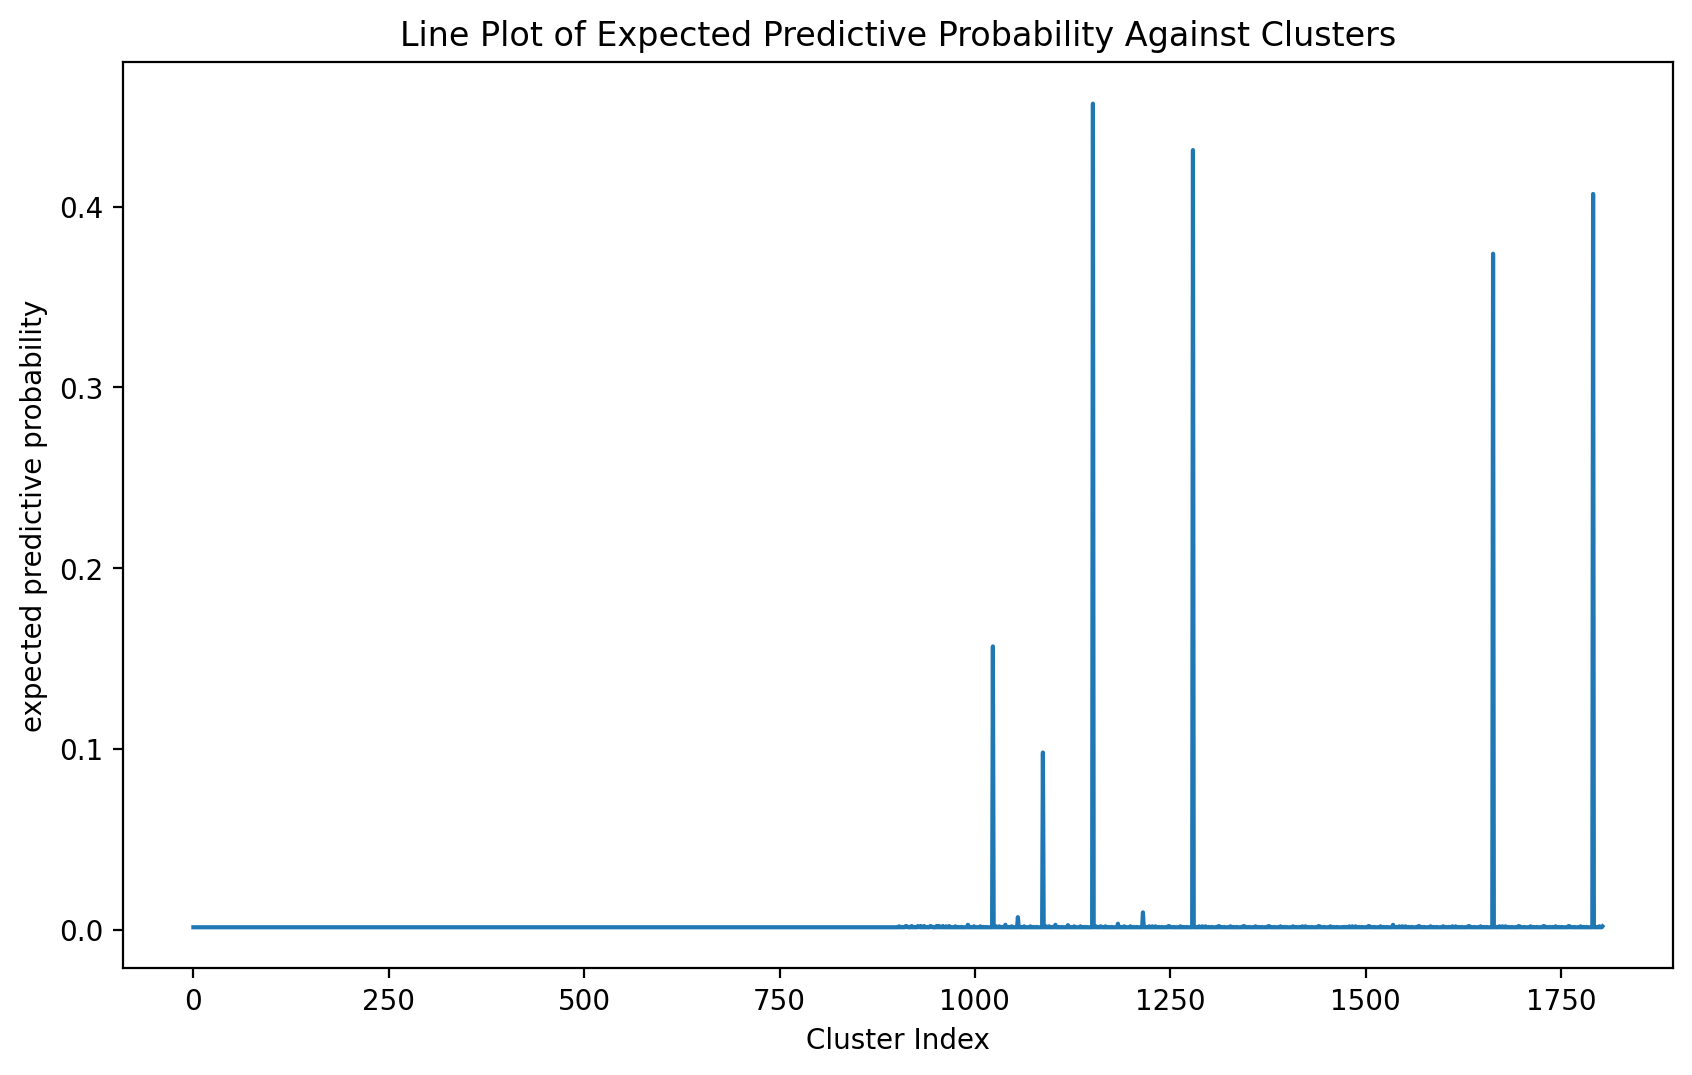

In [136]:
fig, ax = plt.subplots(figsize=(10,6), dpi=200)
sns.lineplot(x = [i for i in range(len(y))], y = y,ax=ax)
ax.set(title='Line Plot of Expected Predictive Probability Against Clusters',
       xlabel='Cluster Index',
       ylabel='expected predictive probability'
      )
plt.show()

### First

$\alpha_{cluster} = \alpha_{label} = 0.1$

$Decision Threshold = 0.5$

$Maximum Depth = 4$

In [6]:
my_agg = my_aggclustering(msdat, 0.1, 0.5, 0.1, 2)

In [7]:
my_agg.fit()
with open('data/aggclustering2.pkl', 'wb') as f:
    pickle.dump(my_agg, f)

Depth 0 started.
Depth 0 finished. Time spent: 79.54s.
Depth 1 started.
Depth 1 finished. Time spent: 979.96s.


In [8]:
with open('data/aggclustering2.pkl', 'rb') as f:
    my_agg = pickle.load(f)
clustering = my_agg.memory['clustering']
init_commands_lists = my_agg.memory['init_commands_lists']
posterior_dicts = my_agg.memory['posterior_dicts']
expected_predictive_prob = my_agg.memory['expected_predictive_prob']
A_list = my_agg.memory['A_list']
E_list = my_agg.memory['E_list']
seq_rank_list = my_agg.memory['seq_rank_list']
cluster_num = my_agg.memory['cluster_num']

In [10]:
cluster_num

49

In [9]:
len(find_expected_predictive_prob(expected_predictive_prob, 2))

49

In [126]:
pred_prob = find_expected_predictive_prob(expected_predictive_prob, 4)
y = list(pred_prob.values())

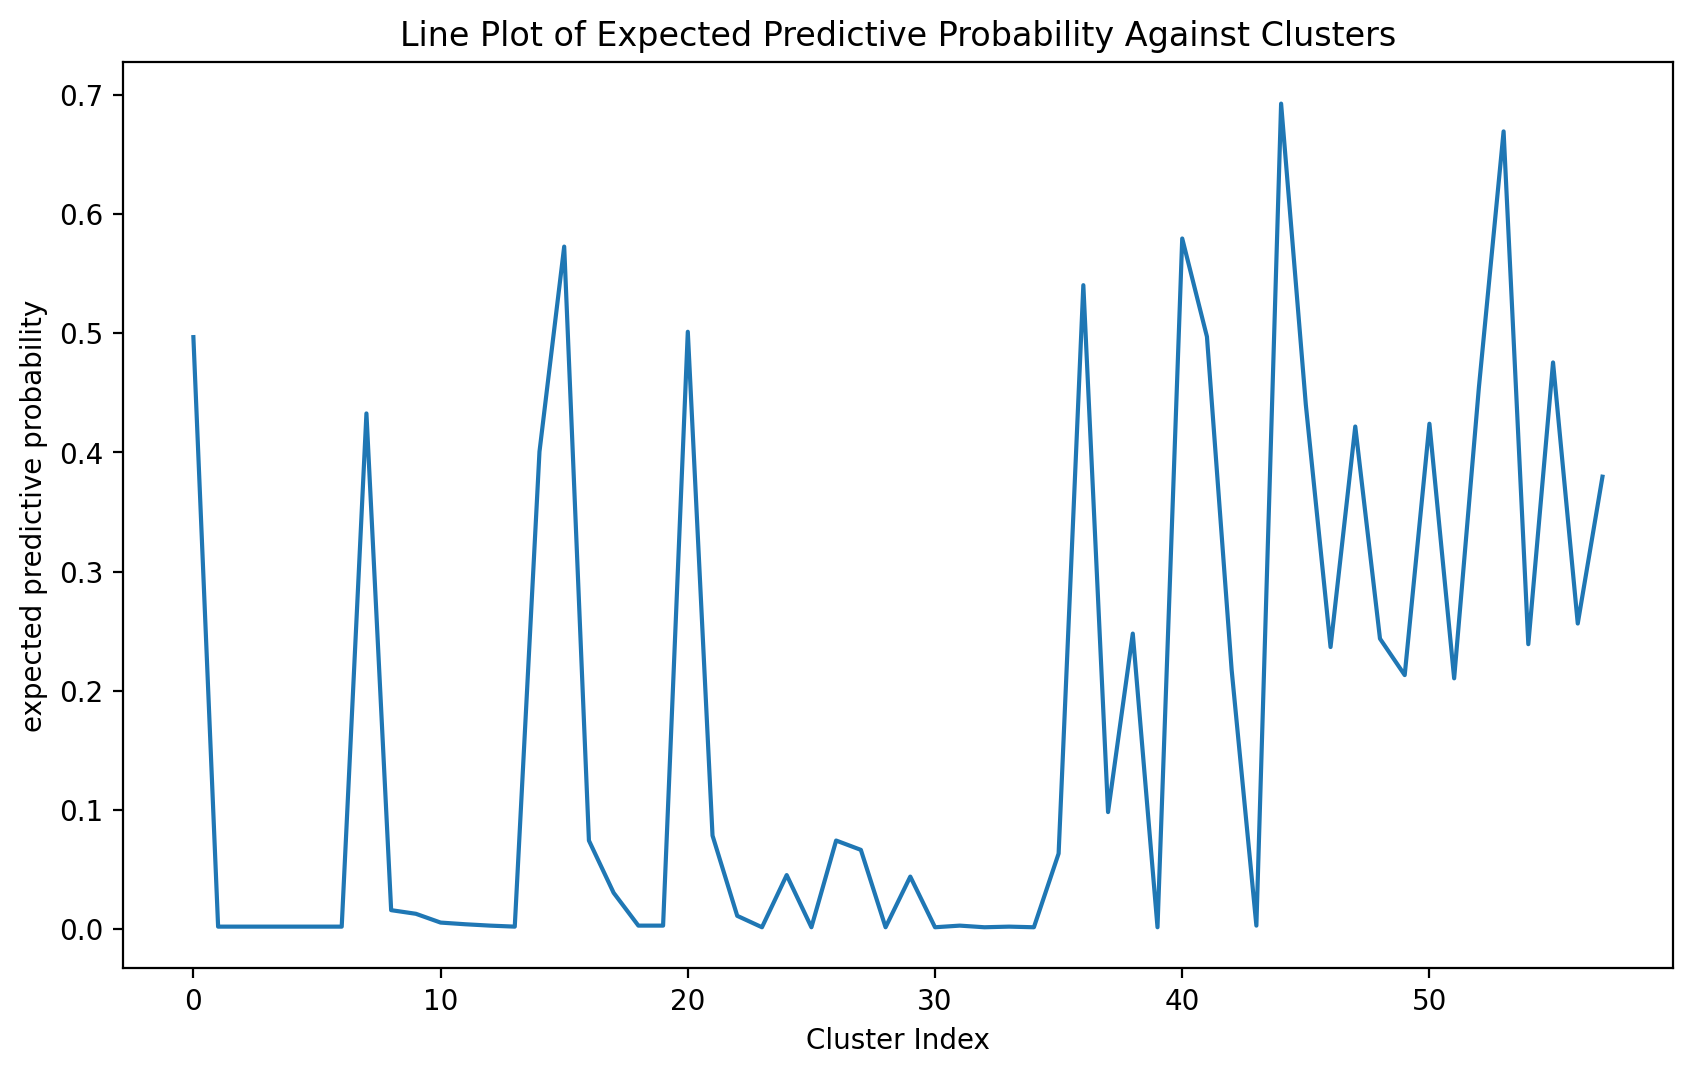

In [132]:
fig, ax = plt.subplots(figsize=(10,6), dpi=200)
sns.lineplot(x = [i for i in range(len(y))], y = y, ax=ax)
ax.set(title='Line Plot of Expected Predictive Probability Against Clusters',
       xlabel='Cluster Index',
       ylabel='expected predictive probability'
      )
plt.show()

### Second